# Concrete Compressive Strength Dataset 3D Visualization Lab

## Dataset Overview
The Concrete Compressive Strength dataset is a comprehensive collection of 1,030 samples of concrete mixtures, each described by seven ingredient proportions and the curing age. The target variable is the measured compressive strength (MPa), which reflects the material's performance under load. This dataset is widely used in research and industry to study the relationships between concrete mix design and its resulting strength.

- **Source:** UCI Machine Learning Repository
- **Features:** Cement, Slag, FlyAsh, Water, Superplasticizer, CoarseAggregate, FineAggregate, Age (days)
- **Target:** Strength (MPa)

The dataset provides a unique opportunity to explore the interplay between various mix components and curing age, enabling the optimization of concrete designs for specific applications. By analyzing this dataset, we can gain insights into how different proportions of ingredients and curing times influence the compressive strength of concrete. This knowledge is critical for improving the cost-effectiveness, durability, and sustainability of concrete in construction projects.

In this lab, we will create five distinct 3D visualizations to explore how mix components and curing age influence compressive strength. These visualizations will help us uncover patterns, trends, and relationships that are not immediately apparent in the raw data. By leveraging these insights, we aim to provide actionable recommendations for optimizing concrete mix designs to achieve desired performance outcomes.

In [9]:
%%bash
# Install the required version of the xlrd library silently
pip install --quiet xlrd==2.0.1

# Use a Python script to process the dataset
python - << 'PYCODE'
import pandas as pd

# Load the dataset from the given URL using the xlrd engine
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls', engine='xlrd')

# Rename the columns for better readability
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 'Age', 'Strength']

import pickle

# Save the processed DataFrame to a pickle file for later use
pickle.dump(df, open('df_concrete.pkl', 'wb'))
PYCODE

In [10]:
import pandas as pd

# Load the preprocessed dataset from the pickle file
df = pd.read_pickle('df_concrete.pkl')

# Display the first few rows of the dataset to understand its structure
df.head()

,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## 3D Scatter Plot: Cement vs Water vs Strength

**Purpose and Rationale:** This visualization aims to explore the interaction between cement and water proportions and their combined effect on compressive strength. By plotting these variables in a 3D space, we can identify trends and patterns that help optimize concrete mix designs. This plot is particularly useful for understanding how varying the proportions of these two critical ingredients influences the resulting strength of the concrete.

**Big Takeaway:** The plot reveals that high cement content combined with moderate water levels achieves peak compressive strength. However, excessive water content significantly reduces strength, even when cement levels are high. This underscores the importance of maintaining a balanced water-to-cement ratio to achieve optimal performance. The findings highlight that the densest cluster of high-strength points lies at Cement ~300–350 kg/m³ and Water ~150–180 kg/m³, representing the ideal mix for maximum strength.

- **What does this image show?** Each point in the scatter plot represents a sample from the dataset, with Cement on the x-axis, Water on the y-axis, and Strength on the z-axis. The color of each point corresponds to the compressive strength, with a gradient indicating variations in strength levels. This allows for a clear visual representation of how the proportions of cement and water influence strength.

- **What is its highlight?** The plot highlights a region where the combination of cement and water proportions results in the highest compressive strength. This region is characterized by moderate water levels and high cement content, emphasizing the importance of the water-to-cement ratio in achieving optimal strength.

- **What can people learn?** By analyzing this plot, users can gain valuable insights into the relationship between cement, water, and compressive strength. This knowledge can be applied to optimize concrete mix designs for specific applications, ensuring cost-effectiveness and high performance. Additionally, the plot serves as a visual reminder of the detrimental effects of excessive water on concrete strength, even when cement content is high.

- **Why is this important?** Understanding the relationship between these variables is crucial for designing concrete mixtures that meet specific strength requirements while minimizing material costs. This knowledge is particularly valuable in construction projects where the performance of concrete is critical to structural integrity and durability. By optimizing the water-to-cement ratio, engineers can achieve the desired strength while reducing waste and ensuring sustainability.

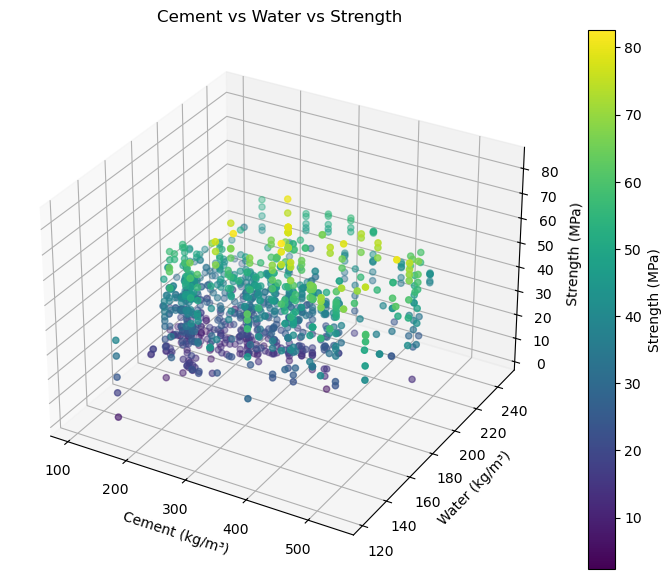

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a figure with specified size
fig = plt.figure(figsize=(10,7))

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot with Cement, Water, and Strength as axes
# Color the points based on Strength using the 'viridis' colormap
scatter = ax.scatter(df['Cement'], df['Water'], df['Strength'], c=df['Strength'], cmap='viridis')

# Set labels for the axes
ax.set_xlabel('Cement (kg/m³)')
ax.set_ylabel('Water (kg/m³)')
ax.set_zlabel('Strength (MPa)')

# Set the title of the plot
ax.set_title('Cement vs Water vs Strength')

# Add a color bar to indicate the Strength values
fig.colorbar(scatter, label='Strength (MPa)')

# Save the plot as a PNG image with high resolution
plt.savefig('plot-images/DanielTongu_CementWaterStrength.png', dpi=300)

# Display the plot
plt.show()

## 3D Surface Plot: Cement vs Age vs Strength

**Purpose and Rationale:** Model how curing age and cement content jointly influence strength gain over time. This visualization provides a continuous representation of the relationship between these variables, enabling a deeper understanding of how concrete strength evolves with varying cement proportions and curing durations.

**Big Takeaway:** Higher cement mixes gain strength faster in the early days, with diminishing returns after ~28 days. This highlights the importance of optimizing cement content for early strength development while avoiding excessive cement usage that may not yield proportional strength gains over time.

- **What does this image show?** A continuous surface mapping Strength as a function of Cement (x-axis) and Age (y-axis). The z-axis represents the compressive strength, while the color gradient further emphasizes variations in strength across the surface.

- **What is its highlight?** The steepest strength gains occur for high cement content during the first 28 days. Beyond this period, the rate of strength gain slows significantly, indicating that prolonged curing has limited benefits for high-cement mixtures.

- **What can people learn?** This plot demonstrates the trade-off between cement content and curing time. It suggests that project schedules should be planned around rapid early strength gains in high-cement mixtures, especially for time-sensitive construction projects. Additionally, it underscores the diminishing returns of extended curing for high-cement mixes, encouraging more efficient use of materials.

- **Why is this important?** Understanding the interplay between cement content, curing age, and strength is crucial for designing cost-effective and high-performance concrete mixtures. This knowledge helps engineers balance material costs, construction timelines, and structural requirements, ensuring optimal outcomes for various applications.

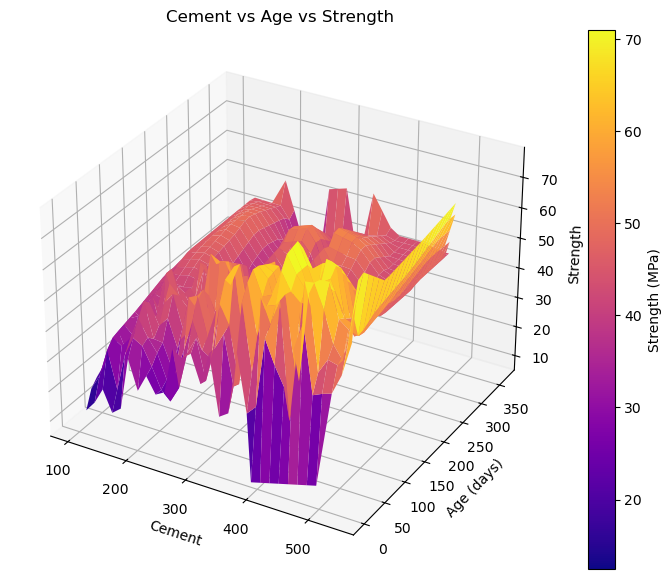

In [12]:
from scipy.interpolate import griddata

# Extract the relevant columns from the dataframe
x, y, z = df['Cement'], df['Age'], df['Strength']

# Create a grid of points for interpolation
xi = np.linspace(x.min(), x.max(), 30)  # Generate 30 points between min and max of Cement
yi = np.linspace(y.min(), y.max(), 30)  # Generate 30 points between min and max of Age
xi, yi = np.meshgrid(xi, yi)  # Create a 2D grid from the 1D arrays

# Interpolate the Strength values on the grid using linear interpolation
zi = griddata((x, y), z, (xi, yi), method='linear')

# Create a figure for the 3D surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with the interpolated Strength values
surf = ax.plot_surface(xi, yi, zi, cmap='plasma', linewidth=0)

# Set axis labels
ax.set_xlabel('Cement')  # Label for the x-axis
ax.set_ylabel('Age (days)')  # Label for the y-axis
ax.set_zlabel('Strength')  # Label for the z-axis

# Set the title of the plot
ax.set_title('Cement vs Age vs Strength')

# Add a color bar to indicate the Strength values
fig.colorbar(surf, label='Strength (MPa)')

# Save the plot as a PNG image with high resolution
plt.savefig('plot-images/DanielTongu_CementAgeStrength.png', dpi=300)

# Display the plot
plt.show()

## 3D Wireframe Plot: Water vs Superplasticizer vs Strength

**Purpose and Rationale:** This visualization investigates the interplay between water content, superplasticizer dosage, and their combined effect on compressive strength. Superplasticizers are chemical admixtures that improve the workability of concrete while reducing water content. This plot helps us understand whether superplasticizer can mitigate the negative impact of high water content on strength, enabling the design of more efficient concrete mixes.

**Big Takeaway:** The plot reveals that elevated levels of superplasticizer allow for reduced water content while maintaining or even enhancing compressive strength. This finding underscores the importance of using superplasticizers to optimize the water-to-cement ratio, which is critical for achieving high-performance concrete.

- **What does this image show?** The wireframe mesh represents the compressive strength as a function of water content (x-axis) and superplasticizer dosage (y-axis). The z-axis indicates the compressive strength, while the mesh structure provides a clear view of the trends and relationships between these variables.

- **What is its highlight?** A prominent ridge in the plot is observed where superplasticizer dosage exceeds 8 kg/m³ and water content is below 160 kg/m³. This ridge indicates the optimal combination of water and superplasticizer for achieving maximum strength. It highlights the effectiveness of superplasticizers in compensating for reduced water content.

- **What can people learn?** This plot provides actionable insights for concrete mix design. It demonstrates that sufficient superplasticizer dosage can reduce water content without compromising strength, leading to more durable and cost-effective concrete. Engineers can use this information to design mixes that achieve desired strength while minimizing water usage, which is particularly important for sustainability and resource conservation.

- **Why is this important?** Understanding the relationship between water, superplasticizer, and strength is crucial for optimizing concrete performance. Excessive water content weakens concrete by increasing porosity, while insufficient water can make the mix unworkable. Superplasticizers offer a solution by improving workability at lower water levels. This knowledge helps engineers balance strength, workability, and material costs, ensuring high-quality concrete for various applications.

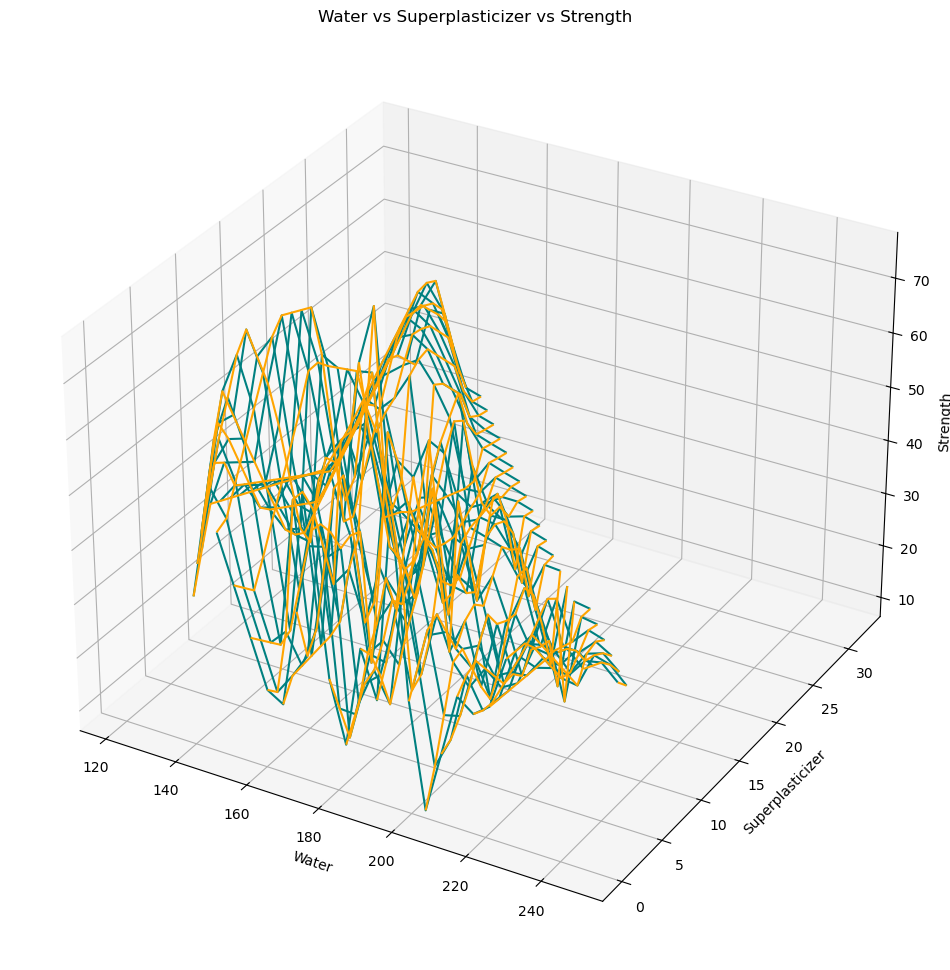

In [13]:
# Create a figure and a 3D subplot
fig = plt.figure(figsize=(12, 24))
ax = fig.add_subplot(111, projection='3d')

# Generate a grid for Water and Superplasticizer
xi = np.linspace(df['Water'].min(), df['Water'].max(), 30)  # X-axis grid points
yi = np.linspace(df['Superplasticizer'].min(), df['Superplasticizer'].max(), 30)  # Y-axis grid points
xi, yi = np.meshgrid(xi, yi)  # Create a 2D grid from the X and Y points

# Interpolate Strength values on the grid
zi = griddata((df['Water'], df['Superplasticizer']), df['Strength'], (xi, yi), method='linear')

# Plot the wireframe with different colors for X and Y lines
ax.plot_wireframe(xi, yi, zi, color='teal', rstride=1, cstride=0)  # X lines in teal
ax.plot_wireframe(xi, yi, zi, color='orange', rstride=0, cstride=1)  # Y lines in orange

# Set axis labels
ax.set_xlabel('Water')
ax.set_ylabel('Superplasticizer')
ax.set_zlabel('Strength')

# Set the title of the plot
ax.set_title('Water vs Superplasticizer vs Strength')

# Save the plot as a PNG image with high resolution
plt.savefig('plot-images/DanielTongu_WaterSuperplasticizerStrength.png', dpi=300)

# Display the plot
plt.show()

## 3D Line Plot: Monthly Avg Cement vs Strength

**Purpose and Rationale:** Aggregate to monthly bins to reveal long-term trends without overplotting. This visualization helps identify how average cement usage and compressive strength evolve over time, providing insights into the curing process and material optimization.

**Big Takeaway:** Strength plateaus after month 3, indicating limited gains from extended curing. This suggests that most of the strength development occurs in the early months, emphasizing the importance of early curing practices.

- **What does this image show?** A colored line tracing monthly-averaged Cement and Strength over time. The x-axis represents the month, the y-axis shows the average cement usage, and the z-axis indicates the average compressive strength. The color gradient along the line corresponds to the progression of months.

- **What is its highlight?** Noticeable flattening of strength gains beyond the third month. This plateau indicates that further curing has diminishing returns on strength improvement, especially after the early stages.

- **What can people learn?** Optimize curing schedules to focus on early strength development. This insight can help reduce project timelines and material costs by prioritizing early curing efforts.

- **Why is this important?** Understanding the relationship between curing time, cement usage, and strength is critical for designing efficient and cost-effective concrete mixtures. By focusing on early strength gains, engineers can achieve desired performance while minimizing unnecessary curing time and resource usage.

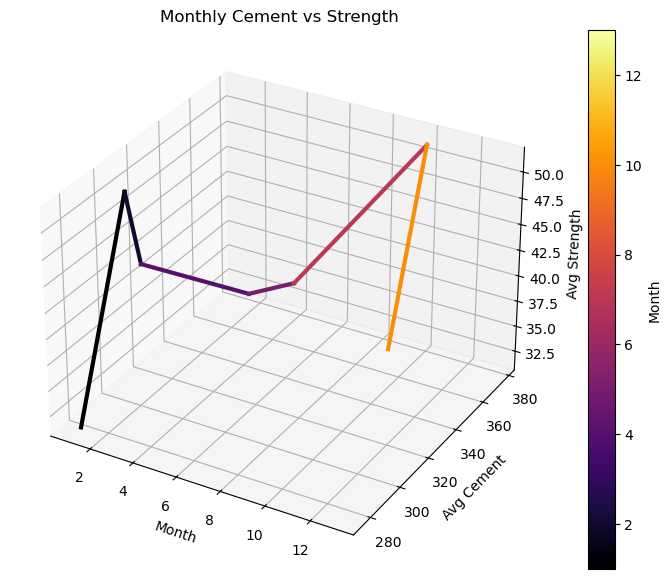

In [14]:
from matplotlib import cm

# Add a new column 'Month' to the dataframe, representing the curing month
df['Month'] = (df['Age'] // 30) + 1

# Group the data by 'Month' and calculate the mean of 'Cement' and 'Strength'
monthly = df.groupby('Month').agg({'Cement': 'mean', 'Strength': 'mean'}).reset_index()

# Normalize the 'Month' values for color mapping
norm = plt.Normalize(monthly['Month'].min(), monthly['Month'].max())

# Generate colors for each month using the 'inferno' colormap
colors = cm.inferno(norm(monthly['Month']))

# Create a figure and a 3D subplot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D line connecting the monthly averages of Cement and Strength
for i in range(len(monthly) - 1):
    xs = monthly.loc[i:i+1, 'Month']  # X-axis: Month
    ys = monthly.loc[i:i+1, 'Cement']  # Y-axis: Average Cement
    zs = monthly.loc[i:i+1, 'Strength']  # Z-axis: Average Strength
    ax.plot(xs, ys, zs, color=colors[i], linewidth=3)  # Plot the line segment

# Add a color bar to indicate the progression of months
mappable = cm.ScalarMappable(norm=norm, cmap='inferno')
mappable.set_array([])
fig.colorbar(mappable, ax=ax, label='Month')

# Set axis labels
ax.set_xlabel('Month')
ax.set_ylabel('Avg Cement')
ax.set_zlabel('Avg Strength')

# Set the title of the plot
ax.set_title('Monthly Cement vs Strength')

# Save the plot as a PNG image with high resolution
plt.savefig('plot-images/DanielTongu_MonthlyCementStrengthLine.png', dpi=300)

# Display the plot
plt.show()

## 3D Bar Plot: Cement Bins vs Avg Strength

**Purpose and Rationale:** This visualization examines the relationship between binned cement content and the average compressive strength of concrete. By grouping cement values into bins and calculating the mean strength for each bin, we can identify trends and optimal ranges of cement content for achieving high compressive strength.

**Big Takeaway:** The plot reveals that moderate cement content yields the highest average compressive strength. Extremely low or high cement content results in reduced strength, emphasizing the importance of balanced cement usage in concrete mix design.

- **What does this image show?** Each bar represents a bin of cement content, with the height of the bar indicating the average compressive strength for that bin. The x-axis shows the cement bins, the y-axis is unused (single row of bars), and the z-axis represents the average strength. The bars are color-coded to provide a visual gradient of strength values.

- **What is its highlight?** The tallest bars are observed in the middle range of cement bins, indicating that moderate cement content achieves the highest average strength. This highlights the diminishing returns of excessive cement usage and the inadequacy of low cement content.

- **What can people learn?** This plot provides actionable insights for optimizing cement content in concrete mixtures. It demonstrates that balanced cement usage is critical for achieving high compressive strength while avoiding wasteful overuse of materials.

- **Why is this important?** Understanding the relationship between cement content and strength is crucial for designing cost-effective and high-performance concrete mixtures. By identifying the optimal range of cement content, engineers can ensure structural integrity, reduce material costs, and promote sustainability in construction projects.


/var/folders/ds/wj6jlh7x2fgggfz75ng92c0m0000gn/T/ipykernel_39833/457815061.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cement_strength = df.groupby(cement_bins)['Strength'].mean()
/var/folders/ds/wj6jlh7x2fgggfz75ng92c0m0000gn/T/ipykernel_39833/457815061.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Automatically adjust subplot parameters to fit the figure


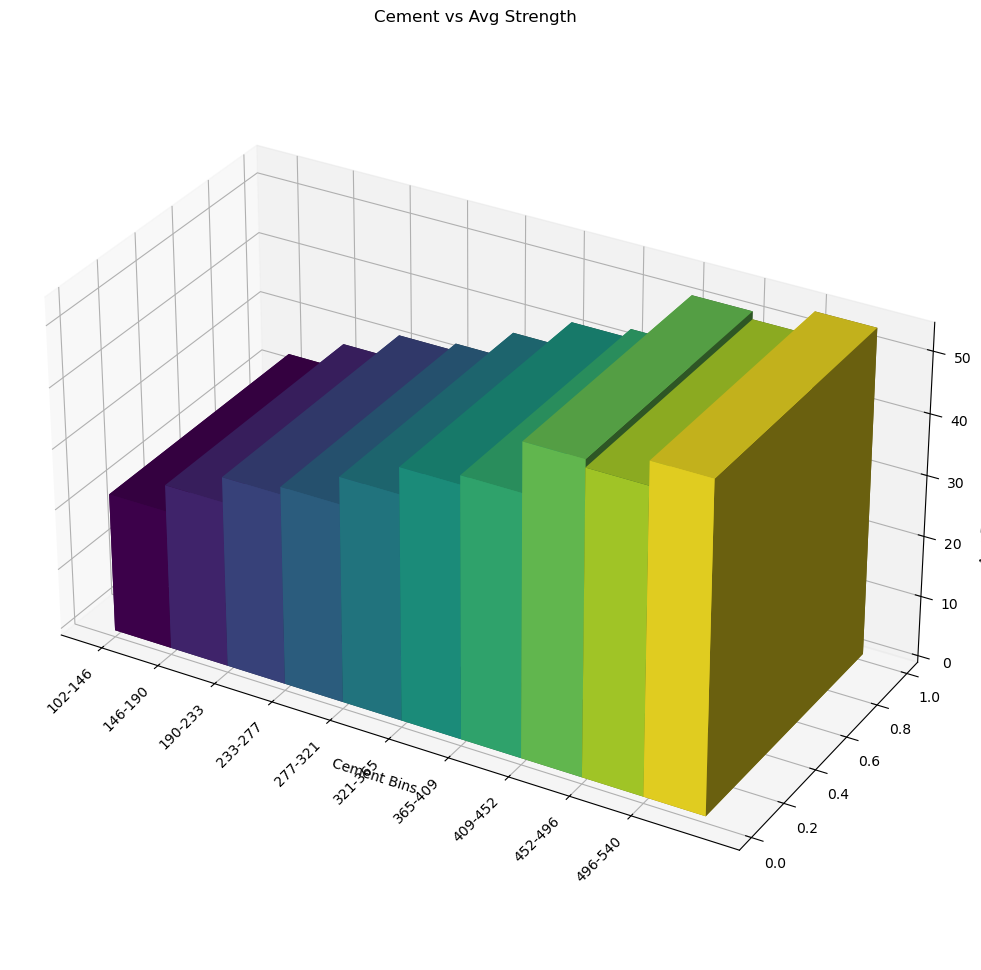

In [15]:
from matplotlib import cm

# Bin the Cement values into ranges
cement_bins = pd.cut(df['Cement'], bins=10)

# Calculate the average Strength for each Cement bin
cement_strength = df.groupby(cement_bins)['Strength'].mean()

# Create a figure and a 3D subplot
fig = plt.figure(figsize=(12, 24))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for the 3D bar plot
x = np.arange(len(cement_strength))  # X-axis: Bin indices
y = np.zeros(len(cement_strength))  # Y-axis: All zeros (single row of bars)
z = np.zeros(len(cement_strength))  # Z-axis: Bars start at 0
dx = np.ones(len(cement_strength))  # Width of each bar
dy = np.ones(len(cement_strength))  # Depth of each bar
dz = cement_strength.values         # Height of each bar (average Strength)

# Generate colors for the bars using a colormap
colors = cm.viridis(np.linspace(0, 1, len(cement_strength)))

# Plot the 3D bar chart with different colors
ax.bar3d(x, y, z, dx, dy, dz, color=colors, shade=True)

# Set axis labels and title
ax.set_xlabel('Cement Bins')  # Label for the X-axis
ax.set_ylabel('')             # Empty label for the Y-axis
ax.set_zlabel('Avg Strength (MPa)')  # Label for the Z-axis
ax.set_title('Cement vs Avg Strength')  # Title of the plot

# Set X-axis tick labels to show the Cement bin ranges
ax.set_xticks(x)
ax.set_xticklabels([f'{interval.left:.0f}-{interval.right:.0f}' for interval in cement_strength.index], rotation=45, ha='right')

# Adjust the aspect ratio and layout to ensure all labels are visible
ax.set_box_aspect([2, 1, 1])  # Aspect ratio for the 3D plot
plt.tight_layout()  # Automatically adjust subplot parameters to fit the figure

# Save the plot as a PNG image with high resolution
plt.savefig('plot-images/DanielTongu_CementStrengthBar.png', dpi=300)

# Display the plot
plt.show()
